<Axes: >

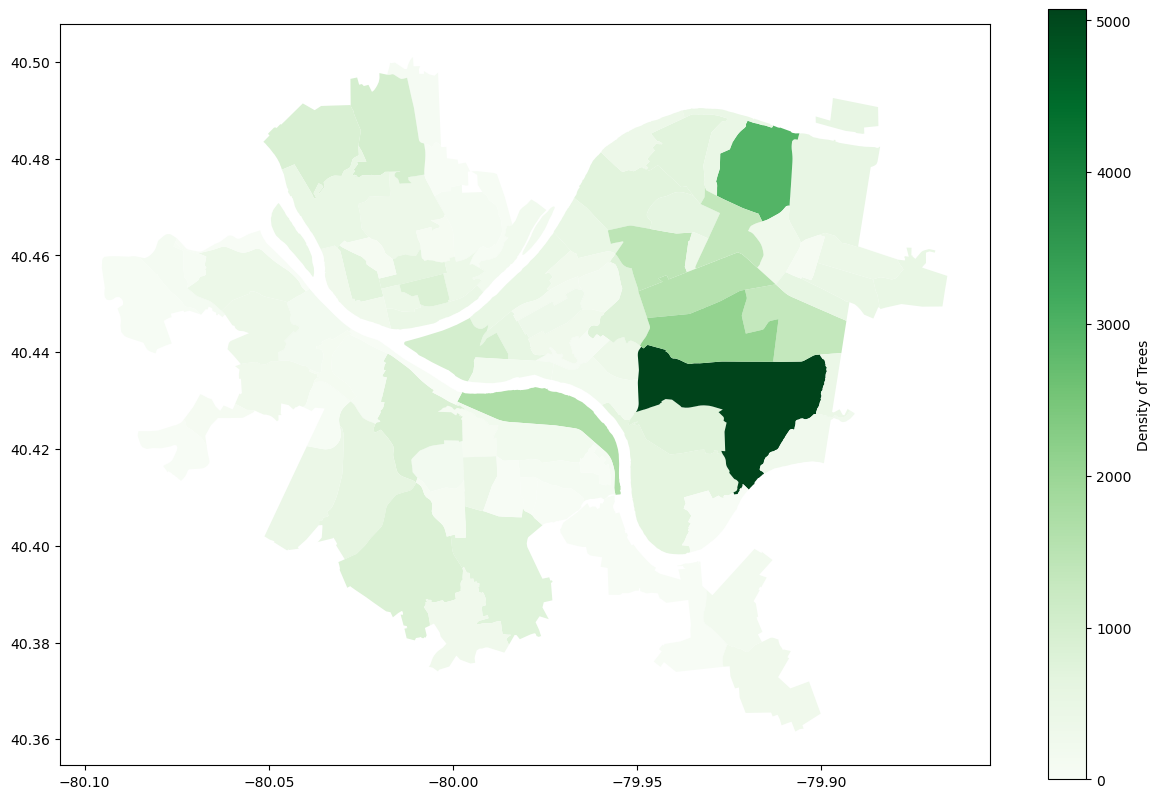

In [7]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

city_pitts_gdf = gpd.read_file("City_of_Pittsburgh_Neighborhoods.shp")
# city_pitts_gdf.plot()

tree_data = pd.read_csv('trees.csv', low_memory = False)



#set frequency of trees to city_pitts_gdf
tree_counts = tree_data['neighborhood'].value_counts()
city_pitts_gdf['tree_count'] = city_pitts_gdf['HOOD'].map(tree_counts).fillna(0)


    
city_pitts_gdf.plot(column = 'tree_count', legend = True, cmap = "Greens", figsize=(15, 10), legend_kwds={"label": "Density of Trees"})

<Axes: >

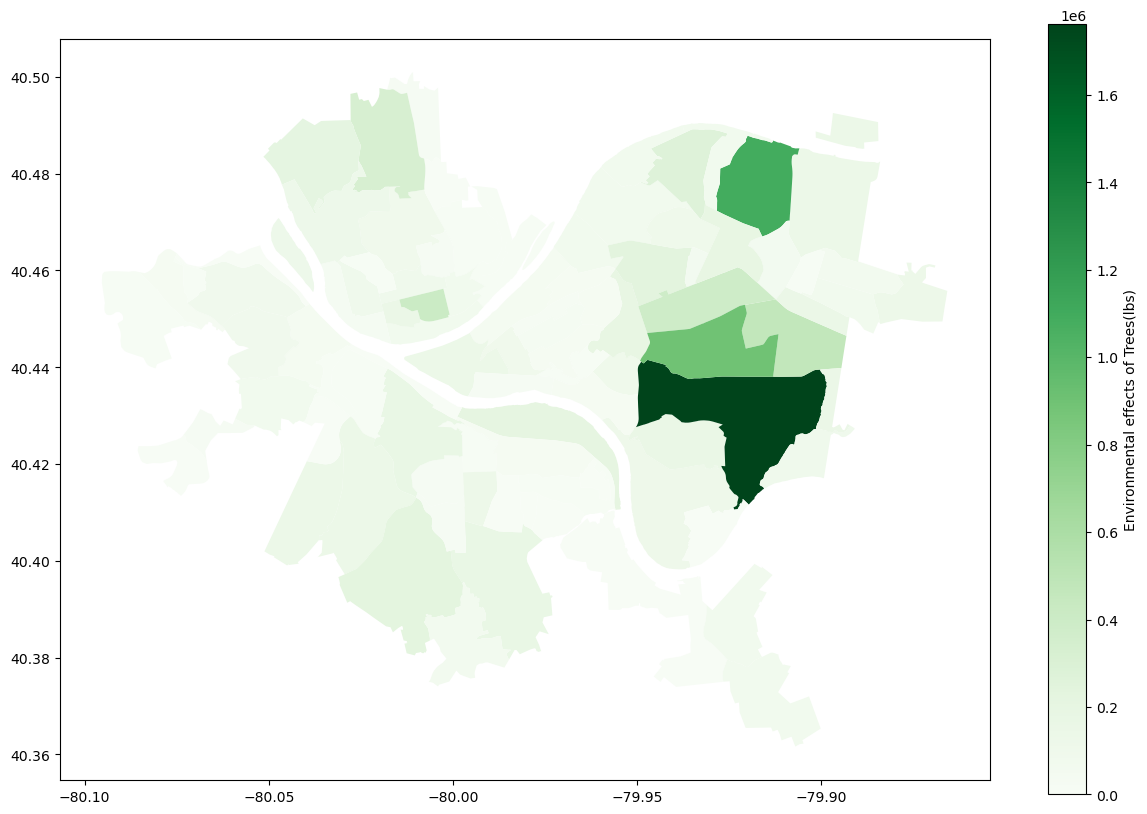

In [25]:
#caculate the total benefits(lbs)
tree_data['total_benefits_lbs'] = tree_data['air_quality_benfits_total_lbs']+tree_data['co2_benefits_totalco2_lbs']
benefit_per_neighborhood_lbs = tree_data.groupby('neighborhood')['total_benefits_lbs'].sum()

#plot
city_pitts_gdf['benefit_lbs'] = city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_lbs).fillna(0)
city_pitts_gdf.plot(column = 'benefit_lbs', legend = True, cmap = "Greens", figsize=(15, 10), legend_kwds={"label": "Environmental effects of Trees(lbs)"})

<Axes: >

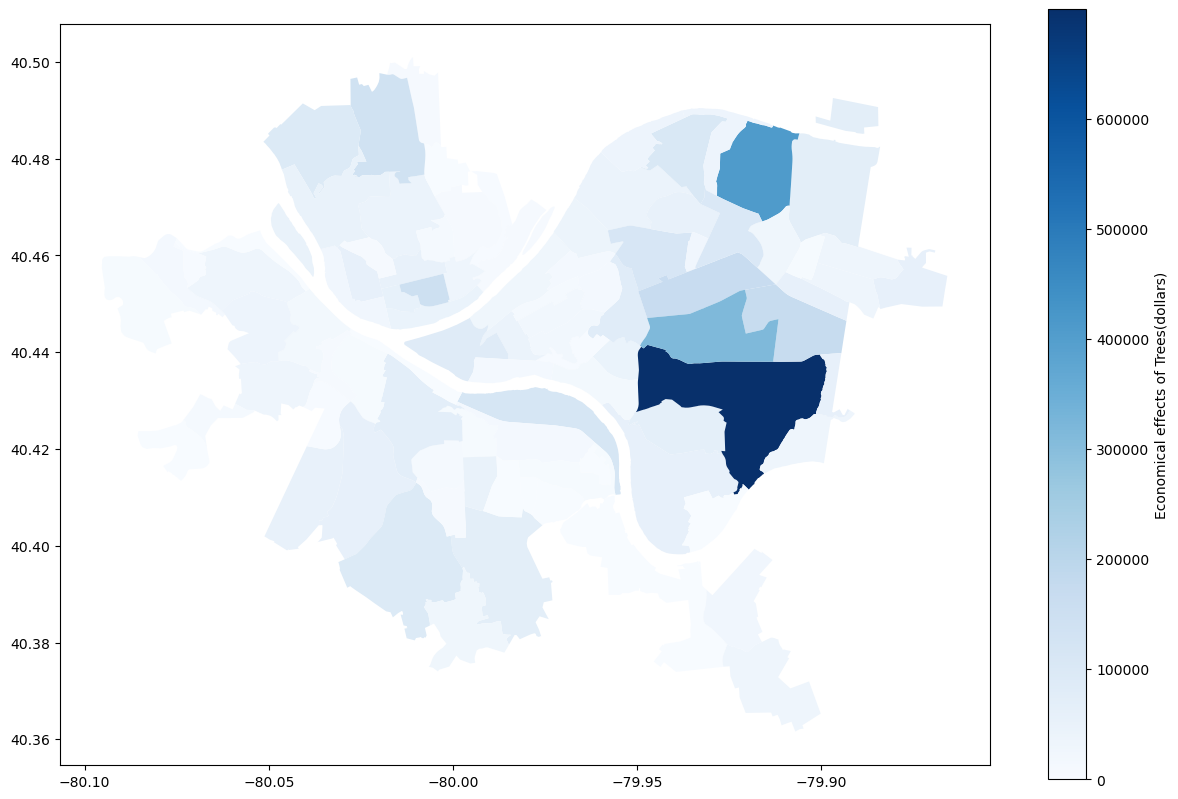

In [26]:
#caculate the total benefits(dollars)
benefit_per_neighborhood_dollars = tree_data.groupby('neighborhood')['overall_benefits_dollar_value'].sum()

#plot
city_pitts_gdf['benefit_dollars'] = city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_dollars).fillna(0)
city_pitts_gdf.plot(column = 'benefit_dollars', legend = True, cmap = "Blues", figsize=(15, 10), legend_kwds={"label": "Economical effects of Trees(dollars)"})

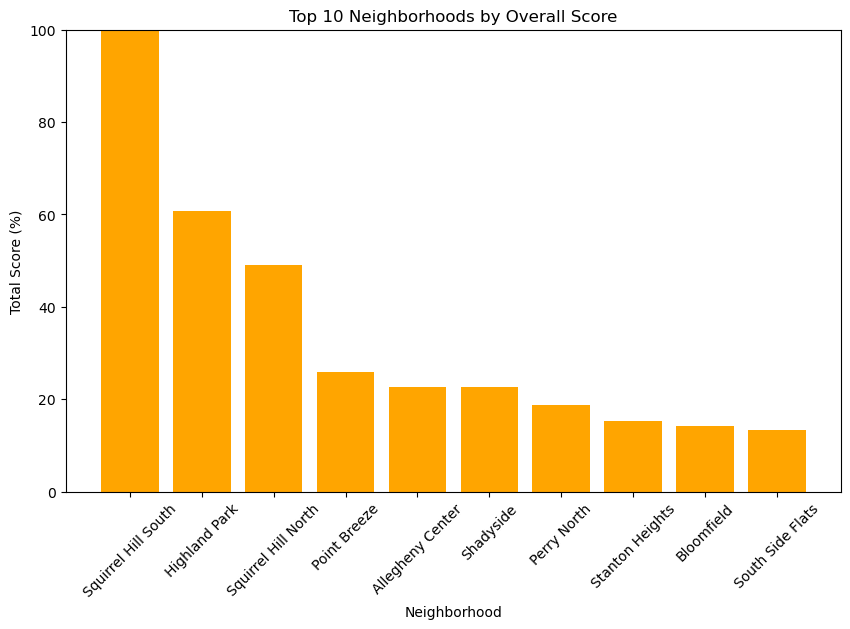

In [31]:
# Find the maximum value for each benefit type to standardize
max_env = benefit_per_neighborhood_lbs.max()
max_eco = benefit_per_neighborhood_dollars.max()

# Calculate standardized scores
city_pitts_gdf['env_score'] = (city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_lbs) / max_env) * 100
city_pitts_gdf['eco_score'] = (city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_dollars) / max_eco) * 100

# Calculate total score
city_pitts_gdf['total_score'] = city_pitts_gdf['env_score'] * 0.7 + city_pitts_gdf['eco_score'] * 0.3

# Sort by total score
top_10 = city_pitts_gdf.sort_values(by='total_score', ascending=False).head(10)

# plot
plt.figure(figsize=(10, 6))
plt.bar(top_10['HOOD'], top_10['total_score'], color='orange')
plt.xlabel('Neighborhood')
plt.ylabel('Total Score (%)')
plt.title('Top 10 Neighborhoods by Overall Score')
plt.xticks(rotation=45)
plt.ylim(0, 100) 
plt.show()